# Chemistry Data Challenge Modeling

To get to the output that the stakeholder wants, we will use the data augmented graphs as input and create clean graphs as outputs, to be able to process the clean graphs into coloured segments.

# Data prep

### Input graph

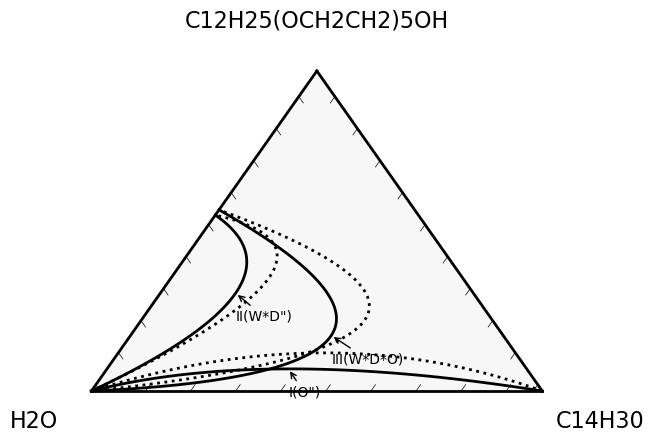

In [1]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.left_axis_label("H2O", fontsize=16, offset=0.12, position=(-0.07, 0.0), rotation=0)
    tax.right_axis_label("C14H30", fontsize=16, offset=0.12, position=(1.07, 0.0), rotation=0)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw custom gridlines
    for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
        # Bottom edge: lines pointing up
        tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Left edge: lines pointing to the right
        tax.line((0, i, 100-i), (2, i-2, 100-i), linewidth=0.5, color='black', linestyle="-", zorder=1)
        
        # Right edge: lines pointing down
        tax.line((100-i, i, 0), (100-i, i-2, 2), linewidth=0.5, color='black', linestyle="-", zorder=1)

    # Define labels
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        # Offset the control points for the dotted line
        offset_control_pts = offset_control_points(control_points)

        # Generate the Bezier curve for the offset line
        offset_curve = bezier_curve(offset_control_pts)

        # Convert the curve points to ternary coordinates
        offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

        # Calculate the midpoint for the label
        midpoint = points[len(points)//2]

        # Randomly select a label
        label = np.random.choice(labels)

        # Add the label with a line pointing to the midpoint of the solid line
        tax.annotate(label, position=midpoint, xytext=(0, -20),
                     textcoords='offset points', arrowprops=dict(arrowstyle='->'), rotation=0)

        # Plot the offset dotted line
        tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Manually add the top label
    tax.ax.text(50, 100, "C12H25(OCH2CH2)5OH", ha='center', va='center', fontsize=16)

    # Remove the axes
    plt.gca().set_axis_off()
    
    # Save the plot to a file before showing it
    plt.savefig("input_ternary_plot.png", dpi=300, bbox_inches='tight')

    # Show the plota
    plt.show()

# Call the function to create the plot
create_ternary_plot()


### Output graph

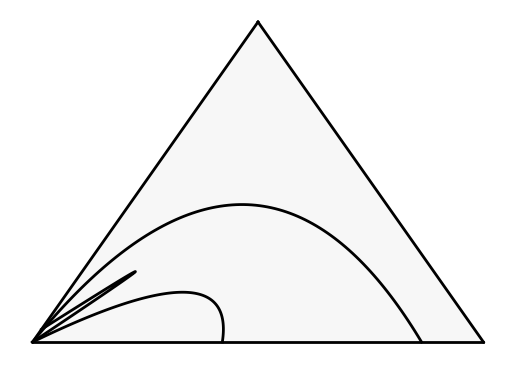

In [2]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw curved phase lines
    num_curves = 3
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

    # Remove the axes
    plt.gca().set_axis_off()

    # Save the plot to a file before showing it
    plt.savefig("output_ternary_plot.png", dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


## combining

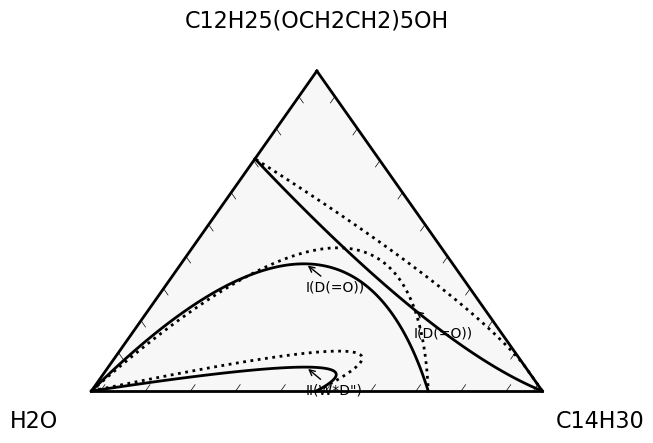

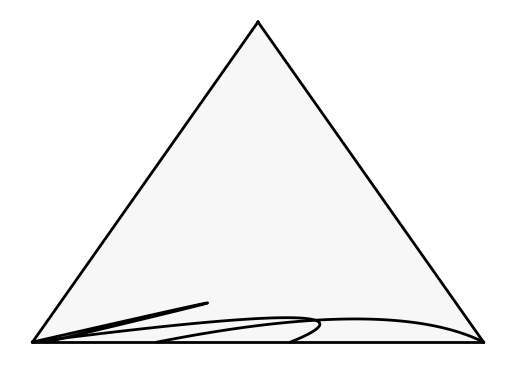

In [3]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot(plot_type="input"):
    figure, tax = ternary.figure(scale=100)

    if plot_type == "input":
        # Set the labels for the compounds
        tax.left_axis_label("H2O", fontsize=16, offset=0.12, position=(-0.07, 0.0), rotation=0)
        tax.right_axis_label("C14H30", fontsize=16, offset=0.12, position=(1.07, 0.0), rotation=0)

        # Draw custom gridlines
        for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
            # Bottom edge: lines pointing up
            tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)

            # Left edge: lines pointing to the right
            tax.line((0, i, 100-i), (2, i-2, 100-i), linewidth=0.5, color='black', linestyle="-", zorder=1)

            # Right edge: lines pointing down
            tax.line((100-i, i, 0), (100-i, i-2, 2), linewidth=0.5, color='black', linestyle="-", zorder=1)

        # Define labels
        labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]
        # Manually add the top label
        tax.ax.text(50, 100, "C12H25(OCH2CH2)5OH", ha='center', va='center', fontsize=16)

    # Draw boundary
    tax.boundary(linewidth=2.0)

    # Draw curved phase lines
    num_curves = 3
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        if plot_type == "input":
            # Offset the control points for the dotted line
            offset_control_pts = offset_control_points(control_points)

            # Generate the Bezier curve for the offset line
            offset_curve = bezier_curve(offset_control_pts)

            # Convert the curve points to ternary coordinates
            offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

            # Calculate the midpoint for the label
            midpoint = points[len(points)//2]

            # Randomly select a label
            label = np.random.choice(labels)

            # Add the label with a line pointing to the midpoint of the solid line
            tax.annotate(label, position=midpoint, xytext=(0, -20),
                         textcoords='offset points', arrowprops=dict(arrowstyle='->'), rotation=0)

            # Plot the offset dotted line
            tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Remove the axes
    plt.gca().set_axis_off()

    # Save the plot to a file before showing it
    plt.savefig(f"{plot_type}_ternary_plot.png", dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot("input")
create_ternary_plot("output")


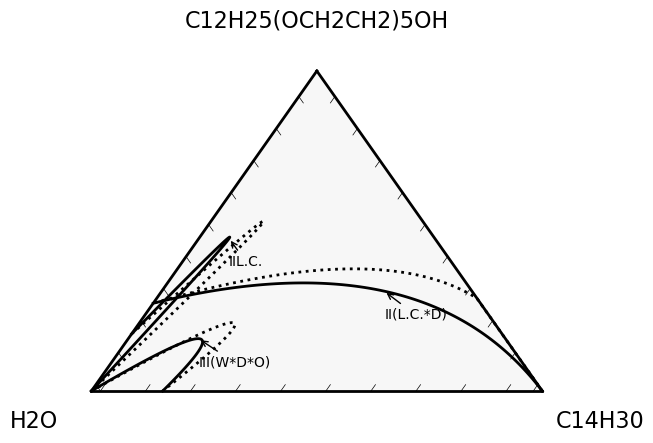

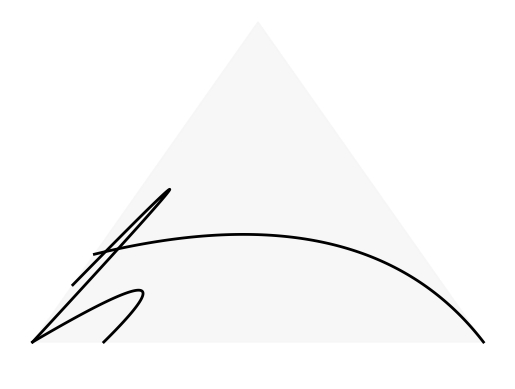

[array([[ 0.        ,  0.        ],
        [ 0.46274005,  0.65461294],
        [ 0.91929402,  1.29586643],
        [ 1.36966191,  1.92376048],
        [ 1.81384371,  2.53829508],
        [ 2.25183942,  3.13947023],
        [ 2.68364905,  3.72728593],
        [ 3.10927259,  4.30174218],
        [ 3.52871005,  4.86283899],
        [ 3.94196142,  5.41057635],
        [ 4.34902671,  5.94495426],
        [ 4.74990591,  6.46597272],
        [ 5.14459903,  6.97363174],
        [ 5.53310606,  7.4679313 ],
        [ 5.915427  ,  7.94887142],
        [ 6.29156186,  8.4164521 ],
        [ 6.66151064,  8.87067332],
        [ 7.02527333,  9.3115351 ],
        [ 7.38284993,  9.73903743],
        [ 7.73424045, 10.15318031],
        [ 8.07944488, 10.55396374],
        [ 8.41846323, 10.94138773],
        [ 8.7512955 , 11.31545226],
        [ 9.07794167, 11.67615735],
        [ 9.39840177, 12.02350299],
        [ 9.71267577, 12.35748919],
        [10.02076369, 12.67811594],
        [10.32266553, 12.985

In [5]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot(plot_type="input", control_points_list=None):
    figure, tax = ternary.figure(scale=100)

    if plot_type == "input":
        # Set the labels for the compounds
        tax.left_axis_label("H2O", fontsize=16, offset=0.12, position=(-0.07, 0.0), rotation=0)
        tax.right_axis_label("C14H30", fontsize=16, offset=0.12, position=(1.07, 0.0), rotation=0)

        tax.boundary(linewidth=2.0)
        for side in ["left", "right", "bottom"]:
            tax.get_axes().spines[side].set_color('black')

        # Draw custom gridlines
        for i in range(2, 100, 10):  # Starting from 2 and not from 0 to avoid drawing over the edges
            # Bottom edge: lines pointing up
            tax.line((i, 0, 100-i), (i, 2, 100-i-2), linewidth=0.5, color='black', linestyle="-", zorder=1)

            # Left edge: lines pointing to the right
            tax.line((0, i, 100-i), (2, i-2, 100-i), linewidth=0.5, color='black', linestyle="-", zorder=1)

            # Right edge: lines pointing down
            tax.line((100-i, i, 0), (100-i, i-2, 2), linewidth=0.5, color='black', linestyle="-", zorder=1)

        # Define labels
        labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    curves = []
    for _ in range(num_curves):
        if control_points_list is None:  # Generate new control points
            control_points = np.random.rand(3, 2) * 100
            control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

            # Ensure the first point is on the bottom left or right corner of the triangle
            if np.random.rand() < 0.5:
                control_points[0] = [0, 0]  # Bottom left corner
            else:
                control_points[0] = [100, 0]  # Bottom right corner

            # Ensure the last point is on a random edge of the triangle
            if np.random.rand() < 0.5:
                control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
            else:
                control_points[-1] = [0, np.random.rand() * 100]  # Left edge
        else:  # Use provided control points
            control_points = control_points_list[_]

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        curves.append(points)

        if plot_type == "input":
            # Offset the control points for the dotted line
            offset_control_pts = offset_control_points(control_points)

            # Generate the Bezier curve for the offset line
            offset_curve = bezier_curve(offset_control_pts)

            # Convert the curve points to ternary coordinates
            offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

            # Calculate the midpoint for the label
            midpoint = points[len(points)//2]

            # Randomly select a label
            label = np.random.choice(labels)

            # Add the label with a line pointing to the midpoint of the solid line
            tax.annotate(label, position=midpoint, xytext=(0, -20),
                         textcoords='offset points', arrowprops=dict(arrowstyle='->'), rotation=0)

            # Plot the offset dotted line
            tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    if plot_type == "input":
        # Manually add the top label
        tax.ax.text(50, 100, "C12H25(OCH2CH2)5OH", ha='center', va='center', fontsize=16)

    # Remove the axes
    plt.gca().set_axis_off()

    # Save the plot to a file before showing it
    plt.savefig(f"{plot_type}_ternary_plot.png", dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

    return control_points_list if control_points_list is not None else [np.array(c)[:, :2] for c in curves]

# Call the function to create the input plot and get control points
control_points_list = create_ternary_plot("input")

# Use the same control points for the output plot
create_ternary_plot("output", control_points_list)


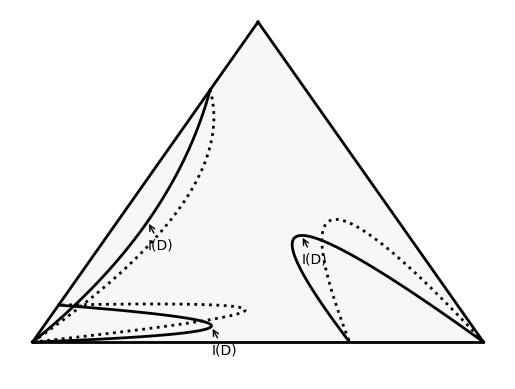

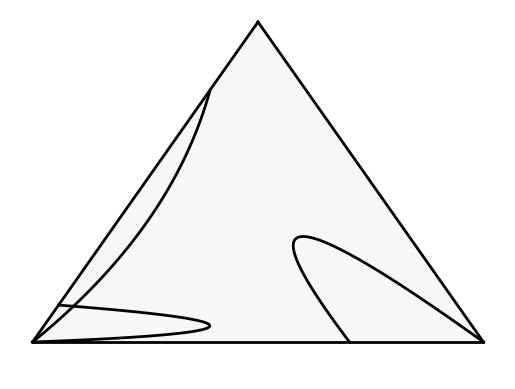

[array([[ 0.        ,  0.        ],
        [ 1.48766666,  0.07953947],
        [ 2.94497278,  0.15983484],
        [ 4.37191835,  0.24088611],
        [ 5.76850338,  0.32269329],
        [ 7.13472787,  0.40525637],
        [ 8.47059181,  0.48857535],
        [ 9.77609521,  0.57265024],
        [11.05123806,  0.65748103],
        [12.29602037,  0.74306772],
        [13.51044213,  0.82941031],
        [14.69450335,  0.91650881],
        [15.84820403,  1.00436321],
        [16.97154416,  1.09297352],
        [18.06452375,  1.18233973],
        [19.12714279,  1.27246184],
        [20.15940129,  1.36333985],
        [21.16129925,  1.45497377],
        [22.13283666,  1.54736359],
        [23.07401353,  1.64050931],
        [23.98482985,  1.73441093],
        [24.86528563,  1.82906846],
        [25.71538087,  1.92448189],
        [26.53511556,  2.02065123],
        [27.32448971,  2.11757647],
        [28.08350331,  2.21525761],
        [28.81215637,  2.31369465],
        [29.51044888,  2.412

In [6]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot(plot_type, control_points_list=None):
    figure, tax = ternary.figure(scale=100)

    # Draw boundary and set its color
    tax.boundary(linewidth=2.0, axes_colors={'l': 'black', 'r': 'black', 'b': 'black'})


    # Set color for boundary lines
    for side in ["left", "right", "bottom"]:
        tax.get_axes().spines[side].set_color('black')
        tax.get_axes().spines[side].set_linewidth(2.0)

    # Set the background color
    tax.clear_matplotlib_ticks()
    tax.get_axes().patch.set_facecolor('white')

    # Set the labels for the compounds
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    curves = []
    for _ in range(num_curves):
        if control_points_list is None:  # Generate new control points
            control_points = np.random.rand(3, 2) * 100
            control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

            # Ensure the first point is on the bottom left or right corner of the triangle
            if np.random.rand() < 0.5:
                control_points[0] = [0, 0]  # Bottom left corner
            else:
                control_points[0] = [100, 0]  # Bottom right corner

            # Ensure the last point is on a random edge of the triangle
            if np.random.rand() < 0.5:
                control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
            else:
                control_points[-1] = [0, np.random.rand() * 100]  # Left edge
        else:  # Use existing control points
            control_points = control_points_list[_]

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        curves.append(curve)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        if plot_type == "input":
            # Offset the control points for the dotted line
            offset_control_pts = offset_control_points(control_points)

            # Generate the Bezier curve for the offset line
            offset_curve = bezier_curve(offset_control_pts)

            # Convert the curve points to ternary coordinates
            offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

            # Calculate the midpoint for the label
            midpoint = points[len(points)//2]

            # Randomly select a label
            label = np.random.choice(labels)

            # Add the label with a line pointing to the midpoint of the solid line
            tax.annotate(label, position=midpoint, xytext=(0, -20),
                         textcoords='offset points', arrowprops=dict(arrowstyle='->'), rotation=0)

            # Plot the offset dotted line
            tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Remove the axes
    plt.gca().set_axis_off()

    # Save the plot to a file before showing it
    plt.savefig(f"{plot_type}_ternary_plot.png", dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

    return control_points_list if control_points_list is not None else [c[:, :2] for c in curves]

# Call the function to create the input plot and get control points
control_points_list = create_ternary_plot("input")

# Use the same control points for the output plot
create_ternary_plot("output", control_points_list)


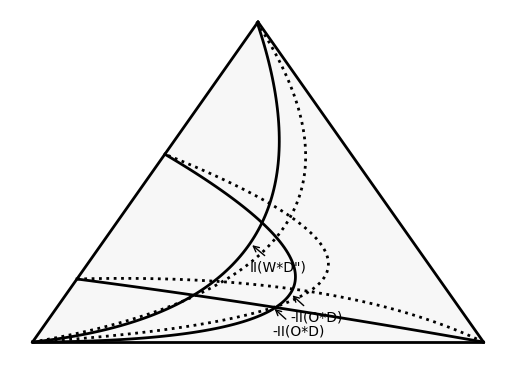

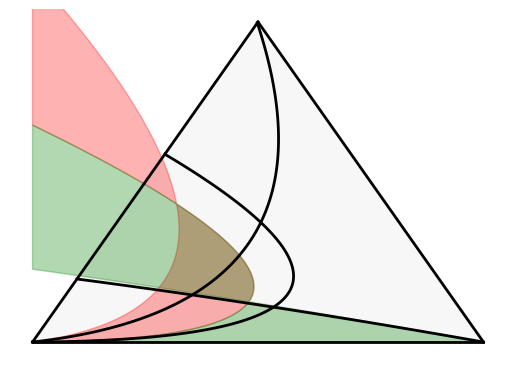

[array([[ 0.        ,  0.        ],
        [ 1.31298204,  0.22604155],
        [ 2.59916853,  0.46801994],
        [ 3.85855947,  0.72593518],
        [ 5.09115485,  0.99978727],
        [ 6.29695469,  1.28957621],
        [ 7.47595897,  1.59530199],
        [ 8.6281677 ,  1.91696462],
        [ 9.75358088,  2.25456409],
        [10.85219851,  2.60810042],
        [11.92402058,  2.97757359],
        [12.9690471 ,  3.3629836 ],
        [13.98727807,  3.76433046],
        [14.97871349,  4.18161417],
        [15.94335336,  4.61483473],
        [16.88119768,  5.06399213],
        [17.79224644,  5.52908638],
        [18.67649965,  6.01011748],
        [19.53395731,  6.50708542],
        [20.36461942,  7.01999021],
        [21.16848597,  7.54883185],
        [21.94555698,  8.09361033],
        [22.69583243,  8.65432566],
        [23.41931233,  9.23097784],
        [24.11599668,  9.82356687],
        [24.78588548, 10.43209274],
        [25.42897872, 11.05655545],
        [26.04527641, 11.696

In [14]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot(plot_type, control_points_list=None):
    figure, tax = ternary.figure(scale=100)

    # Draw boundary and set its color
    tax.boundary(linewidth=2.0, axes_colors={'l': 'black', 'r': 'black', 'b': 'black'})

    # Set color for boundary lines
    for side in ["left", "right", "bottom"]:
        tax.get_axes().spines[side].set_color('black')
        tax.get_axes().spines[side].set_linewidth(2.0)

    # Set the background color
    tax.clear_matplotlib_ticks()
    tax.get_axes().patch.set_facecolor('white')

    # Set the labels for the compounds
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    curves = []
    colors = ['red', 'green', 'blue']  # Specify different colors for each filled area

    for idx in range(num_curves):
        if control_points_list is None:  # Generate new control points
            control_points = np.random.rand(3, 2) * 100
            control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

            # Ensure the first point is on the bottom left or right corner of the triangle
            if np.random.rand() < 0.5:
                control_points[0] = [0, 0]  # Bottom left corner
            else:
                control_points[0] = [100, 0]  # Bottom right corner

            # Ensure the last point is on a random edge of the triangle
            if np.random.rand() < 0.5:
                control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
            else:
                control_points[-1] = [0, np.random.rand() * 100]  # Left edge
        else:  # Use existing control points
            control_points = control_points_list[idx]

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        curves.append(curve)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        if plot_type == "input":
            # Offset the control points for the dotted line
            offset_control_pts = offset_control_points(control_points)

            # Generate the Bezier curve for the offset line
            offset_curve = bezier_curve(offset_control_pts)

            # Convert the curve points to ternary coordinates
            offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

            # Calculate the midpoint for the label
            midpoint = points[len(points)//2]

            # Randomly select a label
            label = np.random.choice(labels)

            # Add the label with a line pointing to the midpoint of the solid line
            tax.annotate(label, position=midpoint, xytext=(0, -20),
                         textcoords='offset points', arrowprops=dict(arrowstyle='->'), rotation=0)

            # Plot the offset dotted line
            tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line
        
    if plot_type == "output":
        # Fill the areas between the curves
        for i in range(num_curves - 1):
            area_points = np.vstack((curves[i], np.flipud(curves[i + 1])))
            plt.fill(area_points[:, 0], area_points[:, 1], color=colors[i], alpha=0.3)

    # Remove the axes
    plt.gca().set_axis_off()

    # Save the plot to a file before showing it
    plt.savefig(f"{plot_type}_ternary_plot.png", dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

    return control_points_list if control_points_list is not None else [c[:, :2] for c in curves]

# Call the function to create the input plot and get control points
control_points_list = create_ternary_plot("input")

# Use the same control points for the output plot
create_ternary_plot("output", control_points_list)


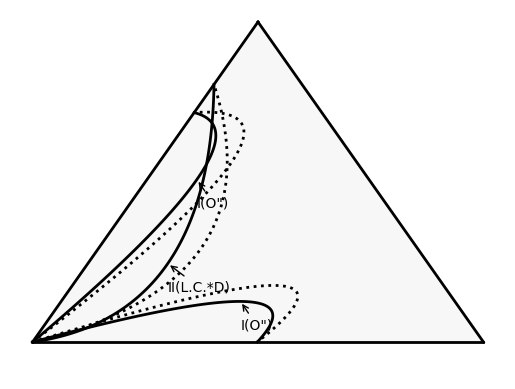

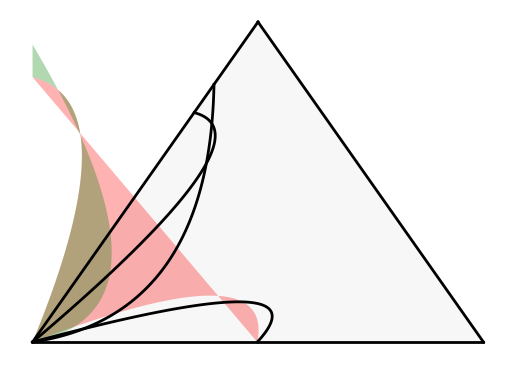

[array([[ 0.        ,  0.        ],
        [ 1.08751047,  0.50742143],
        [ 2.16310196,  1.00448731],
        [ 3.22677446,  1.49119766],
        [ 4.27852798,  1.96755247],
        [ 5.31836251,  2.43355174],
        [ 6.34627805,  2.88919547],
        [ 7.36227461,  3.33448366],
        [ 8.36635218,  3.76941631],
        [ 9.35851076,  4.19399342],
        [10.33875036,  4.60821499],
        [11.30707098,  5.01208103],
        [12.2634726 ,  5.40559152],
        [13.20795525,  5.78874647],
        [14.1405189 ,  6.16154589],
        [15.06116357,  6.52398976],
        [15.96988925,  6.8760781 ],
        [16.86669595,  7.2178109 ],
        [17.75158366,  7.54918816],
        [18.62455239,  7.87020988],
        [19.48560213,  8.18087605],
        [20.33473288,  8.48118669],
        [21.17194465,  8.77114179],
        [21.99723743,  9.05074136],
        [22.81061123,  9.31998538],
        [23.61206604,  9.57887386],
        [24.40160186,  9.8274068 ],
        [25.1792187 , 10.065

In [16]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot(plot_type, control_points_list=None):
    figure, tax = ternary.figure(scale=100)

    # Draw boundary and set its color
    tax.boundary(linewidth=2.0, axes_colors={'l': 'black', 'r': 'black', 'b': 'black'})

    # Set color for boundary lines
    for side in ["left", "right", "bottom"]:
        tax.get_axes().spines[side].set_color('black')
        tax.get_axes().spines[side].set_linewidth(2.0)

    # Set the background color
    tax.clear_matplotlib_ticks()
    tax.get_axes().patch.set_facecolor('white')

    # Set the labels for the compounds
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    curves = []
    colors = ['red', 'green', 'blue']  # Specify different colors for each filled area

    for idx in range(num_curves):
        if control_points_list is None:  # Generate new control points
            control_points = np.random.rand(3, 2) * 100
            control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

            # Ensure the first point is on the bottom left or right corner of the triangle
            if np.random.rand() < 0.5:
                control_points[0] = [0, 0]  # Bottom left corner
            else:
                control_points[0] = [100, 0]  # Bottom right corner

            # Ensure the last point is on a random edge of the triangle
            if np.random.rand() < 0.5:
                control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
            else:
                control_points[-1] = [0, np.random.rand() * 100]  # Left edge
        else:  # Use existing control points
            control_points = control_points_list[idx]

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        curves.append(curve)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        if plot_type == "input":
            # Offset the control points for the dotted line
            offset_control_pts = offset_control_points(control_points)

            # Generate the Bezier curve for the offset line
            offset_curve = bezier_curve(offset_control_pts)

            # Convert the curve points to ternary coordinates
            offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

            # Calculate the midpoint for the label
            midpoint = points[len(points)//2]

            # Randomly select a label
            label = np.random.choice(labels)

            # Add the label with a line pointing to the midpoint of the solid line
            tax.annotate(label, position=midpoint, xytext=(0, -20),
                         textcoords='offset points', arrowprops=dict(arrowstyle='->'), rotation=0)

            # Plot the offset dotted line
            tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line
        
    if plot_type == "output":
        # Fill the areas between the curves
        patches = []
        for i in range(num_curves - 1):
            area_points = np.vstack((curves[i], np.flipud(curves[i + 1])))
            polygon = Polygon(area_points, closed=True, edgecolor='none', facecolor=colors[i], clip_on=True, alpha=0.3)
            patches.append(polygon)
        
        # Create a patch collection and add it to the plot
        collection = PatchCollection(patches, match_original=True)
        tax.get_axes().add_collection(collection)

    # Remove the axes
    plt.gca().set_axis_off()

    # Save the plot to a file before showing it
    plt.savefig(f"{plot_type}_ternary_plot.png", dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

    return control_points_list if control_points_list is not None else [c[:, :2] for c in curves]

# Call the function to create the input plot and get control points
control_points_list = create_ternary_plot("input")

# Use the same control points for the output plot
create_ternary_plot("output", control_points_list)


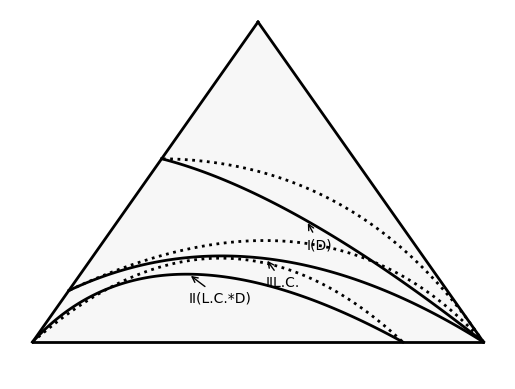

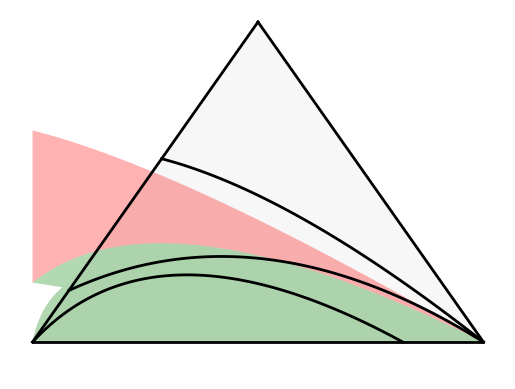

[array([[100.        ,   0.        ],
        [ 98.68164626,   0.93889344],
        [ 97.36958339,   1.87043026],
        [ 96.06381139,   2.79461045],
        [ 94.76433026,   3.71143401],
        [ 93.47114001,   4.62090095],
        [ 92.18424063,   5.52301126],
        [ 90.90363212,   6.41776494],
        [ 89.62931448,   7.305162  ],
        [ 88.36128771,   8.18520243],
        [ 87.09955182,   9.05788624],
        [ 85.8441068 ,   9.92321342],
        [ 84.59495265,  10.78118397],
        [ 83.35208937,  11.63179789],
        [ 82.11551697,  12.47505519],
        [ 80.88523543,  13.31095587],
        [ 79.66124477,  14.13949991],
        [ 78.44354498,  14.96068733],
        [ 77.23213607,  15.77451813],
        [ 76.02701802,  16.58099229],
        [ 74.82819085,  17.38010983],
        [ 73.63565455,  18.17187075],
        [ 72.44940912,  18.95627503],
        [ 71.26945457,  19.7333227 ],
        [ 70.09579088,  20.50301373],
        [ 68.92841807,  21.26534814],
        [ 67

In [17]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot(plot_type, control_points_list=None):
    figure, tax = ternary.figure(scale=100)

    # Draw boundary and set its color
    tax.boundary(linewidth=2.0, axes_colors={'l': 'black', 'r': 'black', 'b': 'black'})

    # Set color for boundary lines
    for side in ["left", "right", "bottom"]:
        tax.get_axes().spines[side].set_color('black')
        tax.get_axes().spines[side].set_linewidth(2.0)

    # Set the background color
    tax.clear_matplotlib_ticks()
    tax.get_axes().patch.set_facecolor('white')

    # Set the labels for the compounds
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    curves = []
    colors = ['red', 'green', 'blue']  # Specify different colors for each filled area

    for idx in range(num_curves):
        if control_points_list is None:  # Generate new control points
            control_points = np.random.rand(3, 2) * 100
            control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

            # Ensure the first point is on the bottom left or right corner of the triangle
            if np.random.rand() < 0.5:
                control_points[0] = [0, 0]  # Bottom left corner
            else:
                control_points[0] = [100, 0]  # Bottom right corner

            # Ensure the last point is on a random edge of the triangle
            if np.random.rand() < 0.5:
                control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
            else:
                control_points[-1] = [0, np.random.rand() * 100]  # Left edge
        else:  # Use existing control points
            control_points = control_points_list[idx]

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        curves.append(curve)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        if plot_type == "input":
            # Offset the control points for the dotted line
            offset_control_pts = offset_control_points(control_points)

            # Generate the Bezier curve for the offset line
            offset_curve = bezier_curve(offset_control_pts)

            # Convert the curve points to ternary coordinates
            offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

            # Calculate the midpoint for the label
            midpoint = points[len(points)//2]

            # Randomly select a label
            label = np.random.choice(labels)

            # Add the label with a line pointing to the midpoint of the solid line
            tax.annotate(label, position=midpoint, xytext=(0, -20),
                         textcoords='offset points', arrowprops=dict(arrowstyle='->'), rotation=0)

            # Plot the offset dotted line
            tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line
        
    if plot_type == "output":
        # Fill the areas between the curves
        patches = []
        for i in range(num_curves - 1):
            area_points = np.vstack((curves[i], np.flipud(curves[i + 1])))
            polygon = Polygon(area_points, closed=True, edgecolor='none', facecolor=colors[i], clip_on=True, alpha=0.3)
            patches.append(polygon)
        
        # Create a patch collection and add it to the plot
        collection = PatchCollection(patches, match_original=True)
        collection.set_zorder(-1)  # Set the z-order to ensure the colors are behind the curves
        tax.get_axes().add_collection(collection)

    # Remove the axes
    plt.gca().set_axis_off()

    # Save the plot to a file before showing it
    plt.savefig(f"{plot_type}_ternary_plot.png", dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

    return control_points_list if control_points_list is not None else [c[:, :2] for c in curves]

# Call the function to create the input plot and get control points
control_points_list = create_ternary_plot("input")

# Use the same control points for the output plot
create_ternary_plot("output", control_points_list)


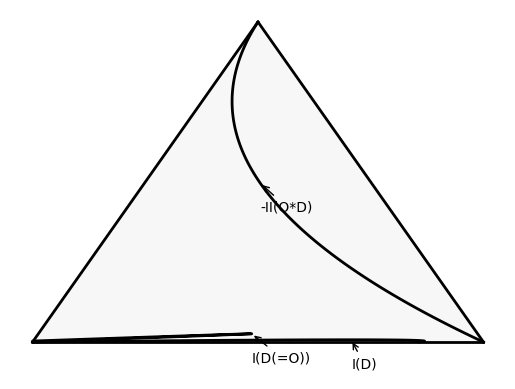

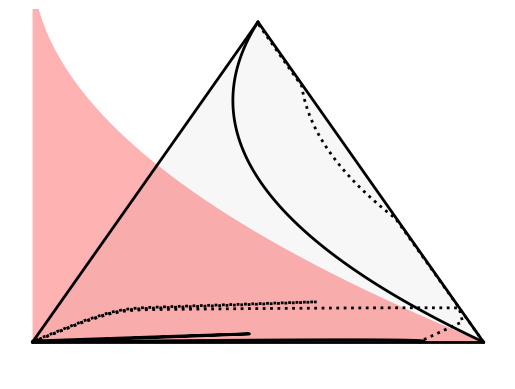

[array([[1.00000000e+02, 0.00000000e+00],
        [9.80367958e+01, 9.78595021e-01],
        [9.60930427e+01, 1.95777767e+00],
        [9.41687407e+01, 2.93754794e+00],
        [9.22638898e+01, 3.91790584e+00],
        [9.03784900e+01, 4.89885137e+00],
        [8.85125413e+01, 5.88038452e+00],
        [8.66660436e+01, 6.86250529e+00],
        [8.48389970e+01, 7.84521369e+00],
        [8.30314015e+01, 8.82850972e+00],
        [8.12432571e+01, 9.81239338e+00],
        [7.94745638e+01, 1.07968647e+01],
        [7.77253216e+01, 1.17819236e+01],
        [7.59955304e+01, 1.27675701e+01],
        [7.42851904e+01, 1.37538042e+01],
        [7.25943014e+01, 1.47406260e+01],
        [7.09228635e+01, 1.57280354e+01],
        [6.92708767e+01, 1.67160325e+01],
        [6.76383410e+01, 1.77046171e+01],
        [6.60252563e+01, 1.86937894e+01],
        [6.44316228e+01, 1.96835493e+01],
        [6.28574403e+01, 2.06738969e+01],
        [6.13027089e+01, 2.16648320e+01],
        [5.97674286e+01, 2.2656354

In [23]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot(plot_type, control_points_list=None):
    figure, tax = ternary.figure(scale=100)

    # Draw boundary and set its color
    tax.boundary(linewidth=2.0, axes_colors={'l': 'black', 'r': 'black', 'b': 'black'})

    # Set color for boundary lines
    for side in ["left", "right", "bottom"]:
        tax.get_axes().spines[side].set_color('black')
        tax.get_axes().spines[side].set_linewidth(2.0)

    # Set the background color
    tax.clear_matplotlib_ticks()
    tax.get_axes().patch.set_facecolor('white')

    # Set the labels for the compounds
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    curves = []
    colors = ['red', 'green', 'blue']  # Specify different colors for each filled area

    patches = []

    for idx in range(num_curves):
        if control_points_list is None:  # Generate new control points
            control_points = np.random.rand(3, 2) * 100
            control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

            # Ensure the first point is on the bottom left or right corner of the triangle
            if np.random.rand() < 0.5:
                control_points[0] = [0, 0]  # Bottom left corner
            else:
                control_points[0] = [100, 0]  # Bottom right corner

            # Ensure the last point is on a random edge of the triangle
            if np.random.rand() < 0.5:
                control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
            else:
                control_points[-1] = [0, np.random.rand() * 100]  # Left edge
        else:  # Use existing control points
            control_points = control_points_list[idx]

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        if plot_type == "output":
            # Offset the control points for the dotted line
            offset_control_pts = offset_control_points(control_points)

            # Generate the Bezier curve for the offset line
            offset_curve = bezier_curve(offset_control_pts)

            # Convert the curve points to ternary coordinates
            offset_points = [(x, y, 100 - x - y) for x, y in offset_curve if 100 - x - y >= 0]

            # Plot the offset dotted line
            tax.plot(offset_points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

        curves.append(curve)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        if plot_type == "input":
            # Calculate the midpoint for the label
            midpoint = points[len(points)//2]

            # Randomly select a label
            label = np.random.choice(labels)

            # Add the label with a line pointing to the midpoint of the solid line
            tax.annotate(label, position=midpoint, xytext=(0, -20),
                         textcoords='offset points', arrowprops=dict(arrowstyle='->'), rotation=0)
        
    if plot_type == "output":
        # Fill the areas between the curves
        for i in range(num_curves - 1):
            # Start with the first curve points
            area_points = np.copy(curves[i])

            # Add the second curve points in reverse order
            second_curve_points = np.copy(curves[i+1])
            second_curve_points = second_curve_points[::-1]  # reverse the array
            area_points = np.vstack((area_points, second_curve_points))
            
            # Create a polygon and add it to the list
            polygon = Polygon(area_points, closed=True, edgecolor='none', facecolor=colors[i], clip_on=True, alpha=0.3)
            patches.append(polygon)

        # Create a patch collection and add it to the plot
        collection = PatchCollection(patches, match_original=True)
        collection.set_zorder(-1)  # Set the z-order to ensure the colors are behind the curves
        tax.get_axes().add_collection(collection)

    # Remove the axes
    plt.gca().set_axis_off()

    # Save the plot to a file before showing it
    plt.savefig(f"{plot_type}_ternary_plot.png", dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

    return control_points_list if control_points_list is not None else [c[:, :2] for c in curves]

# Call the function to create the input plot and get control points
control_points_list = create_ternary_plot("input")

# Use the same control points for the output plot
create_ternary_plot("output", control_points_list)


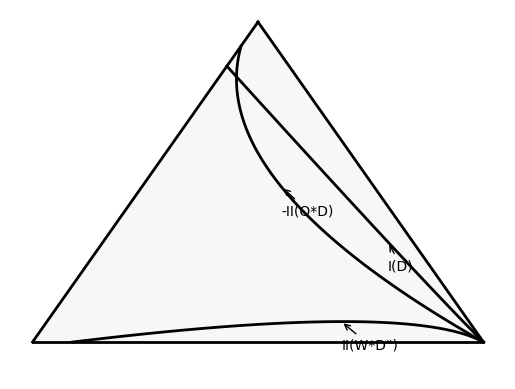

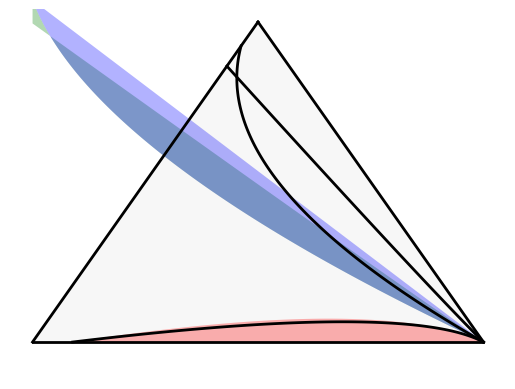

[array([[100.        ,   0.        ],
        [ 99.53157202,   0.25559651],
        [ 99.05392301,   0.50597676],
        [ 98.56705297,   0.75114076],
        [ 98.07096191,   0.9910885 ],
        [ 97.56564982,   1.22581999],
        [ 97.0511167 ,   1.45533522],
        [ 96.52736255,   1.6796342 ],
        [ 95.99438738,   1.89871692],
        [ 95.45219118,   2.11258339],
        [ 94.90077396,   2.3212336 ],
        [ 94.34013571,   2.52466755],
        [ 93.77027643,   2.72288525],
        [ 93.19119612,   2.9158867 ],
        [ 92.60289479,   3.10367189],
        [ 92.00537243,   3.28624082],
        [ 91.39862904,   3.4635935 ],
        [ 90.78266462,   3.63572993],
        [ 90.15747918,   3.8026501 ],
        [ 89.52307271,   3.96435401],
        [ 88.87944522,   4.12084167],
        [ 88.2265967 ,   4.27211307],
        [ 87.56452715,   4.41816822],
        [ 86.89323657,   4.55900711],
        [ 86.21272497,   4.69462975],
        [ 85.52299234,   4.82503613],
        [ 84

In [28]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot(plot_type, control_points_list=None):
    figure, tax = ternary.figure(scale=100)

    # Draw boundary and set its color
    tax.boundary(linewidth=2.0, axes_colors={'l': 'black', 'r': 'black', 'b': 'black'})

    # Set color for boundary lines
    for side in ["left", "right", "bottom"]:
        tax.get_axes().spines[side].set_color('black')
        tax.get_axes().spines[side].set_linewidth(2.0)

    # Set the background color
    tax.clear_matplotlib_ticks()
    tax.get_axes().patch.set_facecolor('white')

    # Set the labels for the compounds
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    curves = []
    colors = ['red', 'green', 'blue']  # Specify different colors for each filled area

    for idx in range(num_curves):
        if control_points_list is None:  # Generate new control points
            control_points = np.random.rand(3, 2) * 100
            control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

            # Ensure the first point is on the bottom left or right corner of the triangle
            if np.random.rand() < 0.5:
                control_points[0] = [0, 0]  # Bottom left corner
            else:
                control_points[0] = [100, 0]  # Bottom right corner

            # Ensure the last point is on a random edge of the triangle
            if np.random.rand() < 0.5:
                control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
            else:
                control_points[-1] = [0, np.random.rand() * 100]  # Left edge
        else:  # Use existing control points
            control_points = control_points_list[idx]

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        curves.append(curve)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        if plot_type == "input":
            # Calculate the midpoint for the label
            midpoint = points[len(points)//2]

            # Randomly select a label
            label = np.random.choice(labels)

            # Add the label with a line pointing to the midpoint of the solid line
            tax.annotate(label, position=midpoint, xytext=(0, -20),
                         textcoords='offset points', arrowprops=dict(arrowstyle='->'), rotation=0)
        
    if plot_type == "output":
        # Fill the areas between the curves
        patches = []
        triangle_edges = [[(0, 0), (100, 0)], [(0, 0), (0, 100)], [(0, 100), (100, 0)]]
        for i in range(num_curves):
            if i == 0:
                area_points = np.vstack((curves[i], np.flipud(triangle_edges[0])))
            elif i == num_curves - 1:
                area_points = np.vstack((curves[i], np.flipud(triangle_edges[2])))
            else:
                area_points = np.vstack((curves[i], np.flipud(curves[i+1])))
            polygon = Polygon(area_points, closed=True, edgecolor='none', facecolor=colors[i], clip_on=True, alpha=0.3)
            patches.append(polygon)
        
        # Create a patch collection and add it to the plot
        collection = PatchCollection(patches, match_original=True)
        collection.set_zorder(-1)  # Set the z-order to ensure the colors are behind the curves
        tax.get_axes().add_collection(collection)

    # Remove the axes
    plt.gca().set_axis_off()

    # Save the plot to a file before showing it
    plt.savefig(f"{plot_type}_ternary_plot.png", dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

    return control_points_list if control_points_list is not None else [c[:, :2] for c in curves]

# Call the function to create the input plot and get control points
control_points_list = create_ternary_plot("input")

# Use the same control points for the output plot
create_ternary_plot("output", control_points_list)


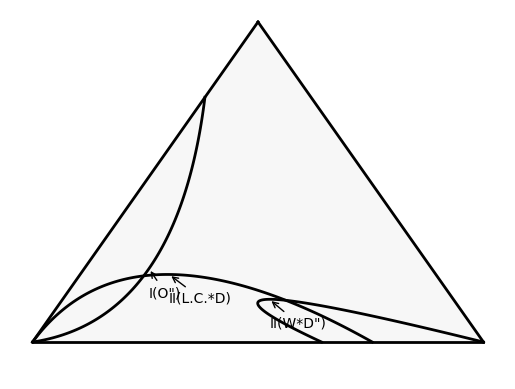

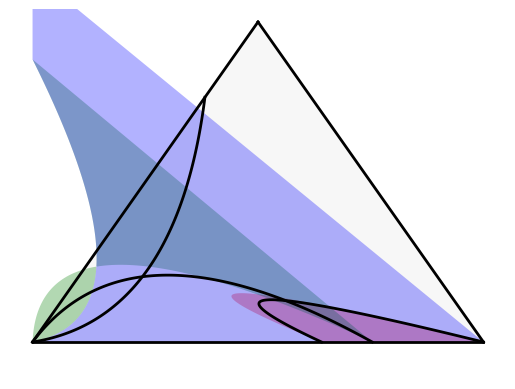

[array([[100.        ,   0.        ],
        [ 98.19558767,   0.53410156],
        [ 96.42059943,   1.05730309],
        [ 94.67503527,   1.56960458],
        [ 92.9588952 ,   2.07100605],
        [ 91.2721792 ,   2.56150748],
        [ 89.61488729,   3.04110888],
        [ 87.98701946,   3.50981025],
        [ 86.38857572,   3.96761159],
        [ 84.81955606,   4.41451289],
        [ 83.27996048,   4.85051417],
        [ 81.76978898,   5.27561541],
        [ 80.28904157,   5.68981662],
        [ 78.83771824,   6.09311779],
        [ 77.41581899,   6.48551894],
        [ 76.02334383,   6.86702005],
        [ 74.66029274,   7.23762114],
        [ 73.32666574,   7.59732219],
        [ 72.02246283,   7.94612321],
        [ 70.747684  ,   8.28402419],
        [ 69.50232925,   8.61102515],
        [ 68.28639858,   8.92712607],
        [ 67.09989199,   9.23232696],
        [ 65.94280949,   9.52662782],
        [ 64.81515108,   9.81002865],
        [ 63.71691674,  10.08252944],
        [ 62

In [30]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot(plot_type, control_points_list=None):
    figure, tax = ternary.figure(scale=100)

    # Draw boundary and set its color
    tax.boundary(linewidth=2.0, axes_colors={'l': 'black', 'r': 'black', 'b': 'black'})

    # Set color for boundary lines
    for side in ["left", "right", "bottom"]:
        tax.get_axes().spines[side].set_color('black')
        tax.get_axes().spines[side].set_linewidth(2.0)

    # Set the background color
    tax.clear_matplotlib_ticks()
    tax.get_axes().patch.set_facecolor('white')

    # Set the labels for the compounds
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    curves = []
    colors = ['red', 'green', 'blue']  # Specify different colors for each filled area

    for idx in range(num_curves):
        if control_points_list is None:  # Generate new control points
            control_points = np.random.rand(3, 2) * 100
            control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

            # Ensure the first point is on the bottom left or right corner of the triangle
            if np.random.rand() < 0.5:
                control_points[0] = [0, 0]  # Bottom left corner
            else:
                control_points[0] = [100, 0]  # Bottom right corner

            # Ensure the last point is on a random edge of the triangle
            if np.random.rand() < 0.5:
                control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
            else:
                control_points[-1] = [0, np.random.rand() * 100]  # Left edge
        else:  # Use existing control points
            control_points = control_points_list[idx]

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        curves.append(curve)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        if plot_type == "input":
            # Calculate the midpoint for the label
            midpoint = points[len(points)//2]

            # Randomly select a label
            label = np.random.choice(labels)

            # Add the label with a line pointing to the midpoint of the solid line
            tax.annotate(label, position=midpoint, xytext=(0, -20),
                         textcoords='offset points', arrowprops=dict(arrowstyle='->'), rotation=0)
        
    if plot_type == "output":
        # Fill the areas between the curves
        patches = []
        triangle_edges = [[(0, 0), (100, 0)], [(0, 0), (0, 100)], [(0, 100), (100, 0)]]
        for i in range(num_curves):
            if i == 0:
                area_points = np.vstack((np.flipud(triangle_edges[0]), curves[i]))
            elif i == num_curves - 1:
                area_points = np.vstack((curves[i], triangle_edges[2]))
            else:
                area_points = np.vstack((curves[i], np.flipud(curves[i+1])))
            polygon = Polygon(area_points, closed=True, edgecolor='none', facecolor=colors[i], clip_on=True, alpha=0.3)
            patches.append(polygon)
        
        # Create a patch collection and add it to the plot
        collection = PatchCollection(patches, match_original=True)
        collection.set_zorder(-1)  # Set the z-order to ensure the colors are behind the curves
        tax.get_axes().add_collection(collection)

    # Remove the axes
    plt.gca().set_axis_off()

    # Save the plot to a file before showing it
    plt.savefig(f"{plot_type}_ternary_plot.png", dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

    return control_points_list if control_points_list is not None else [c[:, :2] for c in curves]

# Call the function to create the input plot and get control points
control_points_list = create_ternary_plot("input")

# Use the same control points for the output plot
create_ternary_plot("output", control_points_list)


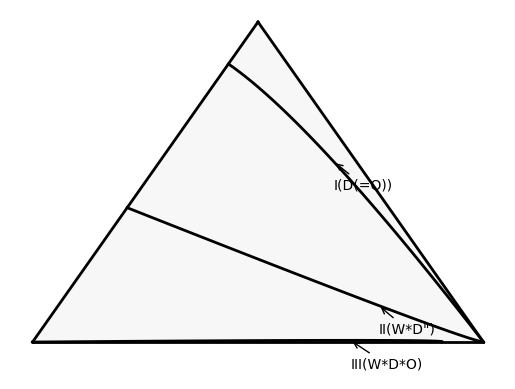

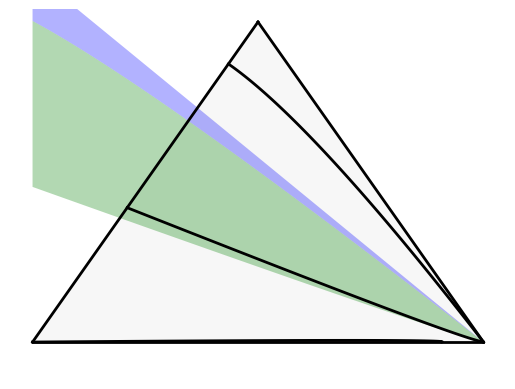

[array([[0.00000000e+00, 0.00000000e+00],
        [1.89193138e+00, 2.11966716e-02],
        [3.76396301e+00, 4.19607580e-02],
        [5.61609489e+00, 6.22922593e-02],
        [7.44832701e+00, 8.21911755e-02],
        [9.26065939e+00, 1.01657507e-01],
        [1.10530920e+01, 1.20691252e-01],
        [1.28256249e+01, 1.39292413e-01],
        [1.45782580e+01, 1.57460989e-01],
        [1.63109914e+01, 1.75196979e-01],
        [1.80238250e+01, 1.92500385e-01],
        [1.97167589e+01, 2.09371205e-01],
        [2.13897930e+01, 2.25809440e-01],
        [2.30429273e+01, 2.41815090e-01],
        [2.46761620e+01, 2.57388155e-01],
        [2.62894968e+01, 2.72528635e-01],
        [2.78829319e+01, 2.87236529e-01],
        [2.94564673e+01, 3.01511839e-01],
        [3.10101029e+01, 3.15354563e-01],
        [3.25438388e+01, 3.28764702e-01],
        [3.40576749e+01, 3.41742256e-01],
        [3.55516112e+01, 3.54287225e-01],
        [3.70256478e+01, 3.66399609e-01],
        [3.84797847e+01, 3.7807940

In [33]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset control points
def offset_control_points(points, offset=10):
    offset_points = np.copy(points)

    # Apply the offset to middle control point(s)
    for i in range(1, len(points) - 1):
        x, y = points[i]

        # Determine the closest edge: bottom (x-axis), left (y-axis), or right (y = 100 - x)
        dist_bottom = y
        dist_left = x
        dist_right = x + y - 100

        closest_edge = np.argmin([dist_bottom, dist_left, dist_right])

        if closest_edge == 0:  # Bottom edge
            offset_points[i, 1] -= offset
        elif closest_edge == 1:  # Left edge
            offset_points[i, 0] -= offset
        else:  # Right edge
            offset_points[i] += offset

    return offset_points

# Function to create the ternary plot
def create_ternary_plot(plot_type, control_points_list=None):
    figure, tax = ternary.figure(scale=100)

    # Draw boundary and set its color
    tax.boundary(linewidth=2.0, axes_colors={'l': 'black', 'r': 'black', 'b': 'black'})

    # Set color for boundary lines
    for side in ["left", "right", "bottom"]:
        tax.get_axes().spines[side].set_color('black')
        tax.get_axes().spines[side].set_linewidth(2.0)

    # Set the background color
    tax.clear_matplotlib_ticks()
    tax.get_axes().patch.set_facecolor('white')

    # Set the labels for the compounds
    labels = ["II(L.C.*D)", "IIL.C.", "II(W*D\")", "I(O\")", "I(D(=O))", "I(D)", "III(W*D*O)", "-II(O*D)"]

    # Draw curved phase lines
    num_curves = 3
    curves = []
    colors = ['red', 'green', 'blue']  # Specify different colors for each filled area

    for idx in range(num_curves):
        if control_points_list is None:  # Generate new control points
            control_points = np.random.rand(3, 2) * 100
            control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

            # Ensure the first point is on the bottom left or right corner of the triangle
            if np.random.rand() < 0.5:
                control_points[0] = [0, 0]  # Bottom left corner
            else:
                control_points[0] = [100, 0]  # Bottom right corner

            # Ensure the last point is on a random edge of the triangle
            if np.random.rand() < 0.5:
                control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
            else:
                control_points[-1] = [0, np.random.rand() * 100]  # Left edge
        else:  # Use existing control points
            control_points = control_points_list[idx]

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        curves.append(curve)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line

        if plot_type == "input":
            # Calculate the midpoint for the label
            midpoint = points[len(points)//2]

            # Randomly select a label
            label = np.random.choice(labels)

            # Add the label with a line pointing to the midpoint of the solid line
            tax.annotate(label, position=midpoint, xytext=(0, -20),
                         textcoords='offset points', arrowprops=dict(arrowstyle='->'), rotation=0)
        
    if plot_type == "output":
        # Fill the areas starting from each curve until a triangle edge or the next curve
        patches = []
        triangle_edges = [[(0, 0), (100, 0)], [(0, 0), (0, 100)], [(0, 100), (100, 0)]]
        for i in range(num_curves):
            if i == 0:  # Start from the bottom edge
                area_points = np.vstack((np.flipud(triangle_edges[0]), curves[i]))
            elif i == num_curves - 1:  # End at the right edge
                area_points = np.vstack((curves[i], triangle_edges[2]))
            else:  # Start from one curve and end at the next one
                area_points = np.vstack((curves[i], np.flipud(curves[i+1])))
            polygon = Polygon(area_points, closed=True, edgecolor='none', facecolor=colors[i], clip_on=True, alpha=0.3)
            patches.append(polygon)
        
        # Create a patch collection and add it to the plot
        collection = PatchCollection(patches, match_original=True)
        collection.set_zorder(-1)  # Set the z-order to ensure the colors are behind the curves
        tax.get_axes().add_collection(collection)

    # Remove the axes
    plt.gca().set_axis_off()

    # Save the plot to a file before showing it
    plt.savefig(f"{plot_type}_ternary_plot.png", dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

    return control_points_list if control_points_list is not None else [c[:, :2] for c in curves]

# Call the function to create the input plot and get control points
control_points_list = create_ternary_plot("input")

# Use the same control points for the output plot
create_ternary_plot("output", control_points_list)
